# End to End Machine Learning Project

In this project we will go through an example project end to end, pretending to be a recently hired data scientist in a real estate company.Here are the main steps we will go through:
<ul>
<li>Look at the big picture.</li>
<li>Get the data.</li>
<li>Discover and visualize the data to gain insights.</li>
<li>Prepare the data for Machine Learning algorithms.</li>
<li>Select a model and train it.</li>
<li>Fine-tune your model.</li>
<li>Present your solution.</li>
<li>Launch, monitor, and maintain your system.</li>
</ul>

This notes are based on excellent book - [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron.

Aurélien offers a checklist of eight mains steps for any Machine Learning Project which can be adapted as we need. This helps in streamlining the project and avoid rework. Let's put them in special format, so we can use it as flash card.

<div class="alert alert-block alert-warning" id='anki_front'>
What are the eight main steps of a machine learning project?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
<ol>
<li>Frame the problem and understand the big picture.</li>
<li>Get the data.</li>
<li>Explore the data to gain initial insights.</li>
<li>Prepare and clean the data to better expose underlying patterns to Machine Learning algorithms.</li>
<li>Explore the different models/approaches and shortlist the most promising ones.</li>
<li>Fine-tune the models and combine them if possible for a better solution.</li>
<li>Present your solution.</li>
<li>Launch, monitor and maintain your solution.</li>
</ol>
</div>

In this project, we are going to follow these steps (more or less, as this is just beginning, we might not have all the context, or some step might be very trivial). Let's say at your job, you are given California Census Data to predict median housing price for each block group in California (districts, which typically has population of 600 to 3000).  The data contains various metrices such as population, median income, and median housing prices etc. Let's try to follow the steps above to solve this problem.

## 1. Frame the problem and understand the big picture

Whenever we start a Machine Learning project, it is better to ask the right questions and look at the big picture before we begin. There are many questions you can ask to get a bigger picture. These questions will help you make better choices down the line.

<div class="alert alert-block alert-warning" id='anki_front'>
What questions should be asked for understanding the big picture of your project?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
<ol>
    <li>What is the business objective of this project?</li>
    <li>What are the current solutions around?</li>
    <li>How will the solution be used?</li>
    <li>What kind of Machine Learning task it? Supervised/Unsupervised. Online/Batch etc</li>
    <li>How should the performance be measured?</li>
    <li>What is the minimum performance needed to reach business objective?</li>
    <li>What exisiting problems are similar to this one? Can we reuse tools, models or experience?</li>
    <li>Is the human expertise available?</li>
    <li>What assumptions are we making? Can we verify them?</li>
    <li>How would you solve the problem manually?</li>
</ol>
</div>

Let's answer as many questions as possible for our problem.

**Business Objective:** The end goal of the project determines how we plan, build and evaluate the model. It should be very clear why we are building the solution? Let's say our model's output will be input to another ML system which along with our output takes many other signals to determine if it is worth investing in an area or not. This is a typical machine learning pipeline.

**Current Solutions:** What if there are already state of art solutions available for this problem? In that case, why re-invent the wheel? It is good idea to gauge performance and architecture of the existing systems. This gives you reference for approaching the problem. Your boss tells you the current process is manual and have error variation of around 20%. In such case, you will like to get your hands dirty.

**Describing the task**: Now, we are designing the system.
* Is it a supervised, unsupervised or Reinforcement learning task? Supervised, as we have labeled training examples.
* Is it a classification, regression or something else? Is is regression as we are going to predict a value.
* Should we use online or batch learning? As there is no continuous data flow coming into the system, there is no requirement to adjust the data rapidly, and the data is small, so we will rely on plain batch learning.

**Measuring the performance**: Now, we have to select how do we measure performance of our model. In general, literature will always help you. Performance measure of regression is usually **Root Mean Square Error** (*RMSE*).
We will come back to this in detail soon. <font color='blue'>Tag: TBD</font>
   
**Assumption Check**: We need to list out our and other peoples' assumptions, even the smaller ones to catch the issue early on. For example in this project, We are assuming that we need to give district's median housing prices in the area. This will be a value i.e. a regression problem. However, what if downstream pipline expects a categorical value (e.g. district categorized as high, medium and low for housing price), in that case it will be a classification problem. You confirmed that the stackholders are indeed expecting a value back.

## 2. Get the data

Okay, we are now ready to get the data. Let's fetch the data. The author has modified the California Census data to fit the purpose of this project, and also graciously provided the code. I have modified the code a bit! Just to code it on my own.

In [2]:
import os
import tarfile
import requests

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    response = requests.get(housing_url)
    open(tgz_path, 'wb').write(response.content)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

## 3. Explore the data to gain initial insights

### Load the data:

Awesome! We got the data, now, let's load this into a `pandas DataFrame` and do some quick explorations. 

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

housing_df = load_housing_data()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Pretty cool! Here each row represents one district. There are 10 columns/attributes this data. Let's see those.

In [4]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Let's get more information about this `DataFrame` using the `info()` method.

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All right, we have 20639 rows in total. All the types except one `ocean_proximity` are numerical  `float64`. `ocean_proximity` column is `object` type which is a string categorical value. Let's see what categories it has, and how many districts are in those categories using `value_counts` method.

In [6]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Awesome, I am guessing those 5 ISLAND districts will be our outliers. Now, Let's get description for numerical columns. We can use `describe` method for it. It gives a summary of all the numerical attributes.

In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


As you can see it describes the data using mean, standard deviation, and various quartiles. It ignores the null values. Look at number of total_bedrooms is 20433. It can be also observed in `info`. 
<div class="alert alert-block alert-warning" id='anki_front'>
How do you describe the categorical attributes of a pandas dataframe?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
Using <code>DataFrame[columnName].value_counts()</code>
</div>

<div class="alert alert-block alert-warning" id='anki_front'>
How do you describe the numerical attributes of a pandas dataframe?
</div>
<div class="alert alert-block alert-success" id='anki_back'>
Using <code>DataFrame.describe()</code>
</div>

To get more feel for the data, let's plot it.

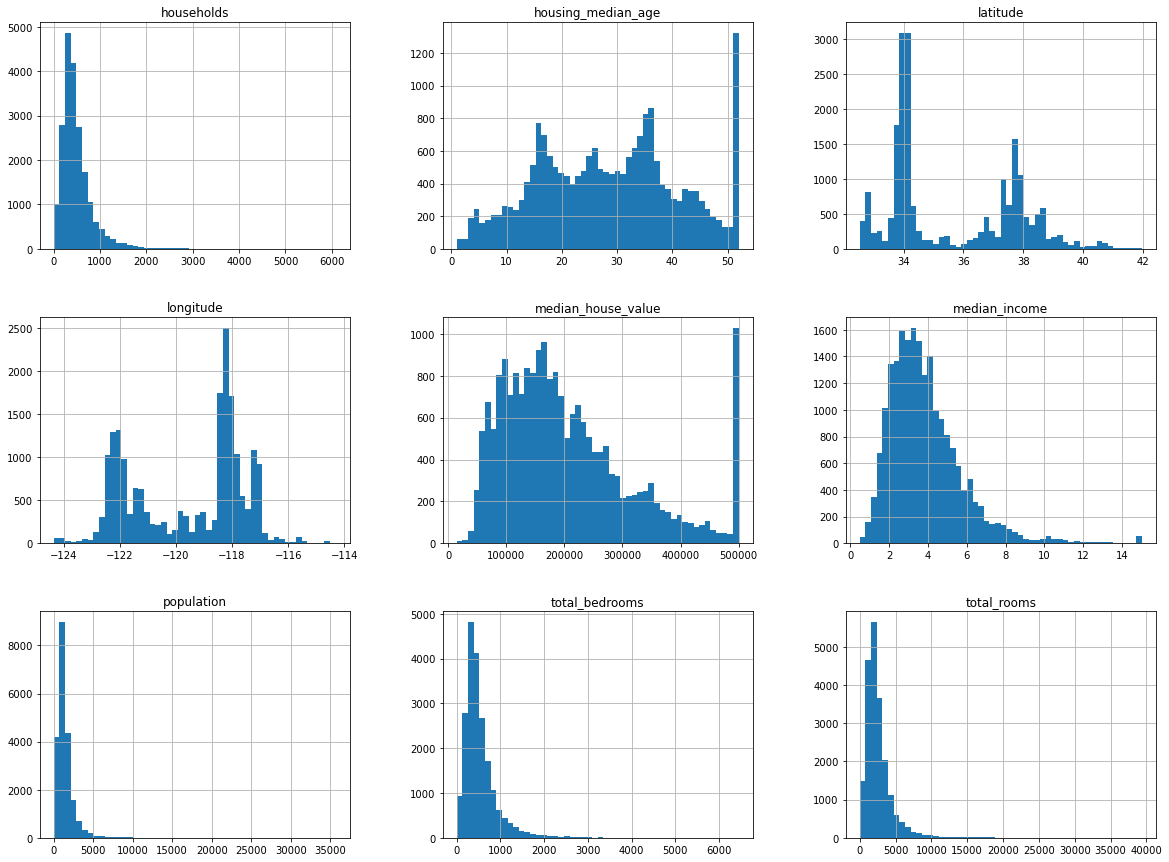

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

Let's analyze these histograms.

1. The median income graph looks fishy. It seems we are not representing the income in true US dollars. On confiming you get information that the median income has been downscaled and capped at 15 for higher median incomes and 0.5 for lower median incomes. The numbers represents rougly tens of thousand. So 10 here means 10,000 dollars.
2. The housing median values seems to be capped too, and apparently so is housing median age. The housing median value is our target label, so it seems we will not able to accurately make predictions beyond 500,000 as our algorithm will never see larger values than that. Ideally, you should bring this up to your team and boss, so you know where algorithm might not work well. May be better data need to be collected.
3. All these attributes are at very different scale. We will come to feature scaling in future.
4. We also might need to transform these attributes later, as the distribution right now are tail-heavy, ie.e they extend much more to the right than to the left.

### Performance Measurement

As mentioned above we will use Root Mean Squared Error (RMSE) to measure performance of our model. 

<div class="alert alert-block alert-warning" id='anki_front'>
    The mathematical formala for <b>RMSE</b> is 

<p style="text-align: center;">
    RMSE(<b>X</b>, <i>h</i>) = $\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)} - y^{(i)})^2}$
</p>

Let's understand the notations and what each variable represent here.

* **m** here represents number of training instances. Soon we will split our data into test, train and validation set. *m* will represent how many instances of data are we using for training. E.g. if we use 80% of our total 20640 district's data for training, we will have ~16500 instances in training set. That will be our *m*

* <b>$x^{(i)}$</b> is a vector of all the feature values (except the target label) of the $i^{th}$ instance and <b>$y^{(i)}$</b> represents the is label. Let's understand this with an example. Say we look at i=3. In the dataset above, $3^{rd}$ instance has longitude -122.25 degrees and 37.85 degrees as lattitude. It has median house age of 52.0 and population of 558. The median house value is \$341,300. Ignoring other features for now this is how we will represent the <i><b>$x^{(3)}$</b></i> and <b>$y^{(3)}$</b> 


$$X^{(3)} = \begin{pmatrix} -122.25 \\ 37.85 \\ 52.0 \\ 558.0 \\ \end{pmatrix}$$

$$y^{(3)} = 341,300$$

* <i><b>X</b></i> is a matrix containing all the feature values (except labels) of all the instances in the dataset. Each row  basically represent an instance we discussed above (<b>$x^{(i)}$</b>), and therefore $i^{th}$ row is equal to transpose of <b>$x^{(i)}$</b> i.e $(x^{(i)})^{T}$

$$\textbf{X} = \begin{pmatrix} (x^{(1)})^{T} \\ (x^{(2)})^{T} \\ . \\ . \\ . \\ (x^{(16449)})^{T} \\ (x^{(16550)})^{T}\end{pmatrix}  = \begin{pmatrix} -122.25 & 37.85 & 52.0 & 558.0 \\ . & . & . & . \\ . & . & . & . \\ . & . & . & . \end{pmatrix}$$
   
* *h* is system's prediction function, also called *hypothesis*. It's right parameters is what we are trying to determine. We want to be as much as close to the unknown/ hidden function which represents relationship between <b>$x^{(i)}$</b> and <b>$y^{(i)}$</b>. When your system is given an instance's feature vector <b>$x^{(i)}$</b>, it outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$ for that instance. Notice the hat!.

    - Let's take the above example again. Say if your system predicts the mean housing price for instance 3 is 336,300 dollars.  Then $\hat{y}^{(3)} = h(x^{(3)}) = 336,000$. The prediction error will be $\hat{y}^{(3)} - y^{(3)} = 5,000$
 
* We then square the error and average this over the **m**. This is the *RMSE*. It gives us sense of how far our hypothesis from actual hidden/unknown function which represents relationship between ***X*** and ***y***. We will go in more details as we make progress.
  </div>  




### Create Test Set.

Before doing any further with data, and introduce unwanted bias, we need to create some test data. We can keep 20% of data as test.

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing_df, 0.2)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


Disadvantage of above function is that we don't this split is not reproducible, because we are splitting with randomness, it will generate different test set each time we run it. Over the time, our machine learning will have seen the whole dataset and it will overfit, i.e. it will not do well for real unseen data. In other words, it will not generalize well, even though it will perform really well for your train and test data.

One solution is to use same random seed everytime, then we will get the same split everytime we run this function. However, it will still be bad when we have updated dataset, which happens quite often in real scenarios. One solution is to use each instance (or row) identifier, and always put them in either test or train. E.g. we can compute a hash of each instance's identifier. If the hash is lower or equal to 20% of the maximum hash value, we put it in test set, else we put it in train set. This way, even if the dataset is updated, the test set will never contain an instance which was previously in training set. Author has provided a quick implementation of it.

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


our housing data doesn't have an identifier, in that case, we can use row index as the id.

In [11]:
housing_with_id = housing_df.reset_index() #creates an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


We just did this splitting for fun, in real world scenario, we should always use `Scikit-Learn`'s splitting function. It provides a few, but the simplest one is `train_test_split()`. It does almost exactly what `split_train_test` does. There is a `random_state` parameter that allows you to set random generator seed to reproduce the same set. It can take multiple datasets together and split them on same indices, it is very useful when we have separate label frame for labels.

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size = 0.2, random_state=42)
print(F"Length of train set: {len(train_set)}")
print(F"Length of test set: {len(test_set)}")

Length of train set: 16512
Length of test set: 4128


#### Stratified Sampling

What we have discuss so far is random sampling. This is okay for a large dataset, but in case of small dataset we can run into a case of sampling bias. Imagine an example of dataset containing emails. Your target label is whether email is a spam or not. Your dataset has 90% legitimate emails and 10% spam emails. If we follow the approach above, it might be possible that our test case will not represent the same distribution. In order to avoid this, we divide the dataset into homogenous subgroups called *strata* and right number of instances are sampled of each stratum to guarantee that the test set is representative of the overall distribution of classes in dataset. Basically, our test and train data should both have roughly 90-10 ratio of legitimate and spam emails. This is called *Stratfied Sampling*.

Now, lets imagine in our case, experts tell you that median income is very good attribute to predict median housing price. As median is a continous varible, let's convert it to a categorical variable. If we observe the median income histogram carefully, we can see how it is distributed.

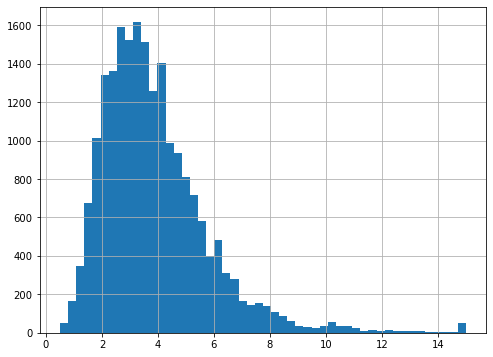

In [13]:
housing_df['median_income'].hist(bins=50, figsize=(8, 6))
plt.show()

We can clearly see most median income are clustered around 1.5 to 6  (i.e. ~\\$15,000-\$60,000), however you can see we have tail there and some income brackets go far beyond 6. It is very important to have sufficient number of instances of each category in your dataset.It is ideal to keep limited stratums and each stratum should be large enough. Let's separate this median income into five ranges using `pd.cut`. Category 1 rangs from 0 to 1.5 (i.e. 0 - $15,000), category 2 from 1.5 - 3 (i.e. \\$15,000 - \\$30,000) and so on.

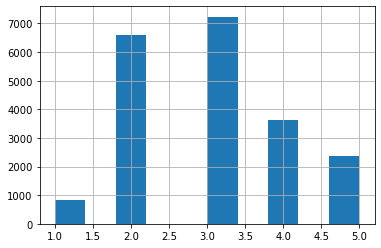

In [14]:
housing_df["income_category"]  = pd.cut(housing_df["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                       labels=[1, 2, 3, 4, 5])
housing_df["income_category"].hist()
plt.show()

Now, we can do *stratified sampling* based on the income category. Foe this we can use `scikit-learn`'s `StratifiedShuffleSplit`

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_category"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

Let's see income category proportions in both test and train split.

In [16]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [17]:
strat_train_set["income_category"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_category, dtype: float64

Pretty cool! Let's remove the "income category" column.

In [18]:
for tset in (strat_train_set, strat_test_set):
    tset.drop("income_category", axis=1, inplace=True)

### Discover and visualize the data to gain insights.

Now, lets dig a little more deeper to gain more insights from the data. Usually this exploration helps us find patterns early in data if there is any. If the training set is too large, it is good idea to sample an exploration set to play with it. Our's is quite small, so we will not sample. Let's just make a copy of it. Also, keep your test data sacred, and shouldn't be touch till you are ready to test your algorithm.

In [19]:
housing = strat_train_set.copy()

We have location data in our dataset, let's visualize it first.

[]

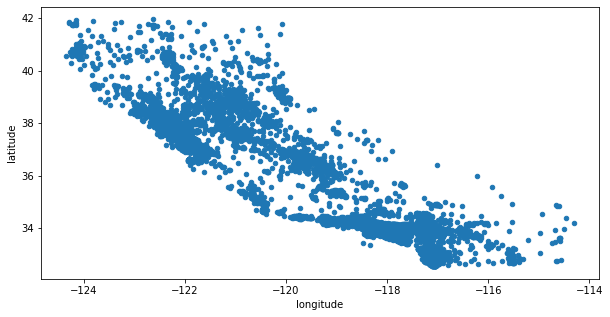

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 5))
plt.plot()

It looks like california, let's see where the data points are densly located.

[]

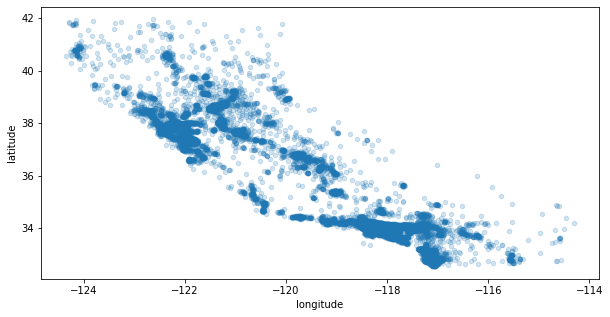

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(10, 5))
plt.plot()

Ok, we do see some dense clusters around Bay-Area, LA etc. Now, let's have some more fun with this. Let's bring in more columns on this map scatter plot.

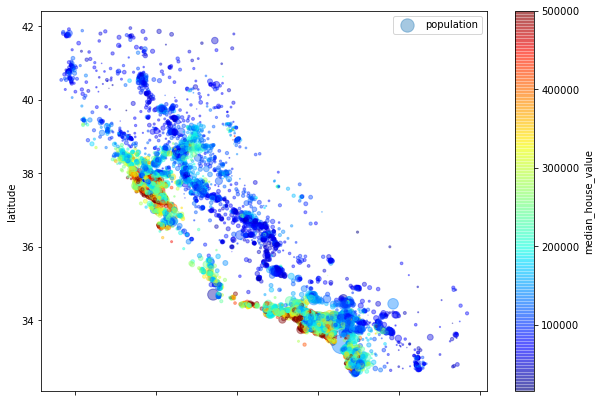

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10, 7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

Let's see what we did there and what each thing represent. We drew a scatter plot for location data (longitude, latitude), and then we use `s` to represent the *size* of each dot in scatter plot, this varies with population. Larger district will have bigger circle radius. `c` on the other hand represetns the *color* with density. Larger the median house value of the district, the color of the circle will be more towards red band, if the median house value is at lower end, its value will be more towards blue band.

This image clearly tells you housing prices are more related to location (e.g. close to ocean) and population densit. Duh, you probably already knew that.

#### Looking for Correlations

Now, lets take a look how correlated our features are. As our dataset is small, We can compute *standard correlation coefficient* (also called *Person's r*) between every pair of attributes using `corr()` method.

In [23]:
corr_matrix = housing.corr()

Let's what is the order of attributes which are most correlated to our target variable.

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient varies from -1 to 1. When it is close to 1, it means we have strong positive correlation, here in our example, median house value tend to go up, if median income goes up. Where when it is close to -1, we have strong negative correlation. We can see slight negative correlation here with latitude, as we go north, we see median house value seems to go down.

We can further visualize the correlation between numerical attributes using `scatter_matrix()` function. We will only choose top 4 to avoid getting too many plots, as this function will draw a graph for each numerical attribute with every other numerical attribute.

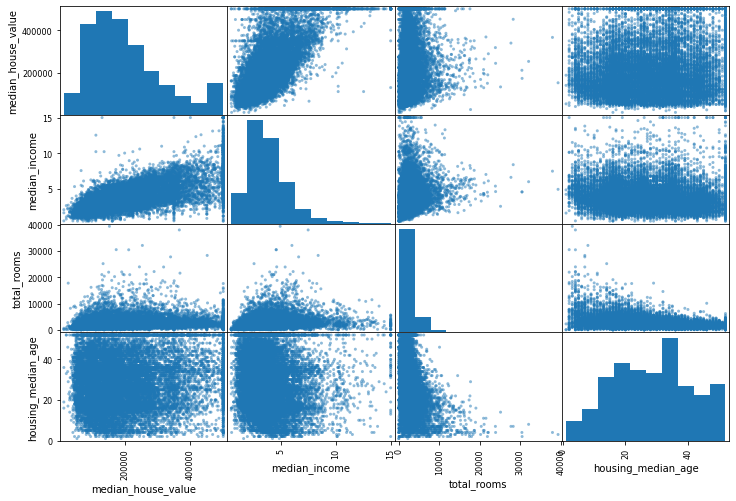

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Let's analyze this amazing plt. First thing to notice it is that `Pandas` doesn't draw correlation plot of attribute with iteself. That will not be useful, instead `pandas` draw historgrams. This is customizable. Now lets see one of the significant chart is relation of `median_inconme` and `median_house_value`. Let's draw it separately.

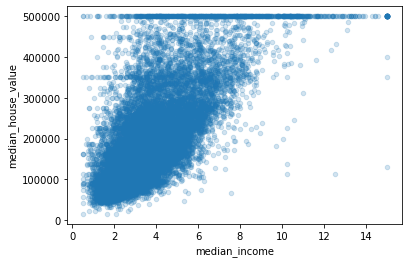

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

Couple of things to notice:

* It is shown that two are strongly positively co-related. As the median income rises, house values seems to go up.
* There is a clear roof at \\$500,000 as our data is capped at \\$500,000. 
* We see some similar straight lines at \\$350,000 and at \\$450,000. Perhaps a less noticeable one at \\$280,000.
* We might have to come back to these data points when we are cleaning this data up.

#### Experimenting with Attribute Combinations.

One of the toughest task of Machine Learning is to choose the right data attributes. The above section gives us some insights on exploring the data. We also noticed that we have tail-heavy distribution, so we may want to transform them.One more thing we can do is to play with combinations of these attributes and may be modify them in such as a way that they are more useful.
e.g. Total number of rooms in a district are not very useful, however, total number of rooms per household might be useful to determine the prices. Similarly, total number of bedrooms in a district doesn't make much sense too, we may want it to comapre it to number of rooms. Another better attribute will be population per household. Let's build these attributes.

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]

Let's take a look at correlation matrix again with the new features.


In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Nice, we have much more correlated attributes now to `median_house_value` than before. You can see `rooms_per_household` tend to positively correlate to our target value. Similarly, lower bedrooms per room ratio tend to have a higher price. This is way more informative than total number of rooms in a district.

## 4. Prepare the data for Machine Learning Algorithms

In this step, we will finally prepare the data before we feed it to machine learning algorithms. It is better to write separate functions for such steps, so you can apply the same kind of transformation for test data later.

### Separate target label from other attributes.

As a first step, separate the target labels from rest of the attributes. We will go back to our original training dataset first.

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

We noticed before that we have some missing values in `total_bedrooms` attribute ofour dataset. We need to fix that before we move on. We have three options.

* Get rid of the corresponding districts where `total_bedrooms` is missing.
* Get rid of the whole attribute.
* Impute the missing values to some values (e.g. mean, median or zero)

`Pandas` provide functions to accompalish all three, `dropna()`, `drop()` and `fillna()`.

`
housing.dropna(subset["total_bedrooms"]) #option 1
housing.drop("total_bedrooms", axis=1) #option 2
#option 3
median_value = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
`

It seems the attribute is important to data, so we should choose option 3 here. We need to save this median value we computed, as we will need it later to replace missing value in test set, also when system goes live to replace missing values in the new data. 

`Scikit-Learn` ofcourse provide this. We can use it's `SimpleImputer` class to do what we discussed above. We will use it with `strategy` median. Also, median can only be applied to numerical values, so we might have to apply this only to numerical attributes, hence we can create a copy of dataset and drop `ocean_proximity` from the data we give to imputer.

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The `imputer` has computed median of each attribute and stored it in its' `statistics_` instance variable. In our case only `total_bedrooms` had missing values, but applying this helps us in the case when system goes live and we get new data which has missing values. Therefore, it is safer to apply the `imputer` to all numeric attributes, so that we are sure we don't have any missing data.

In [37]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


Now we can use this "trained" imputer to tranform the training set by replacing missing values with the "learned" medians. The output is a plain `numpy` array with tranformed features, which we can change it back to `pandas DataFrame`.

In [39]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


#### Handling text and categorical attributes.

In this section, lets see how we can handle text attributes. In our case we only have one `ocean proximity`. Let's look at it.

In [40]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


It looks like these values are not random and may represent a category. Let's say how many such values we have.

In [44]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [47]:
housing_cat['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

It is clear, that we have 5 values for this column, it is indeed a categorical attribute. Machine Learning algorithms prefer to work with numbers, so let's transform these values to numbers.

In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

So now, "<1H OCEAN" has been encoded to value 0 and "NEAR OCEAN" to 4. We can see whole encoding using `categories_` of the `OrdinalEncoder` object.

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this approach is that we might introduce an unwanted bias to the algorithm because of the ordering. Algorithm might assume that this ordering is important for prediction, and can assume two nearby values are more similar than distant ones. That might be fine in cases like bad(0), average(1), good(2), excellent(3). However, in our case we have "<1H OCEAN" as 0 and "NEAR OCEAN" as 4. However, clearly they seem more closer than other values. 

To avoid this, We can create one binary attribute per category. E.g. "<1H OCEAN" can be an attribute of the data with values of either 0 or 1. Similarly another attribute will be "INLAND" with values either 0 or 1, and so on. This is called ***One-hot encoding*** because only one such attribute will be equal to 1(hot) and others will be 0(cold) for an instance. The new attributes are also called *dummy* attributes. Again, `Scikit-Learn` provides a simple easy way to do this.

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice `Scikit-Learn` created a sparase compressed matrix as output. This is useful, because when we use **One-hot encoding** we might endup with thousands of columns depending on number of categories in the attributes. However, the matrix will be full of 0 as only one new attribute will be set to 1. There can be lot of space consumed for these 0s, therefore, Scikit-Learn provides another format which only stores the location of non-zero elements. If you want you can convert it back to dense array by calling `toarray()` method on it.

In [52]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

As before, we can get list of categories using encoder's `categories_` instance variable.

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Author has given a good tip here that if the categorical value has large number of possible categories (e.g. country code, profession, species etc can have large number of possible values), then one-hot encoding will result in large number of input features. This will slow things down during training and will also degrade performance. If this happens, we may want to replace this one categorical input attribute with useful numerical features. As an example, we can replace `ocean_proximity` feature with the distance to ocean, (similarly a country code can be  replaced with country's population and GDP per capita). Alternatively, you can replace each category with a learnable, low dimension vector called an *embedding*. We will come back to it in future chapters.

### Custom Transformers

As we have already seen `Scikit-Learn` provides so many useful transformers, however sometimes we need to write our own for custom cleanup operation or combining specific attributes. We will want our transformers to be working seamlessly with `scikit-Learn`'s functionalities e.g. pipelines). `Scikit-Learn` provides a way to do this seamlessly by creating a class and then implementing three main methods: `fit()`, `transform()` and `fit_transform()`. The last one comes free by simply adding `TransformerMixin` as a base class. Another base class to use  is `BaseEstimator` which avoids variable argument passing (`*kargs` and `*args`). We will also automatically get `get_params()` and `set_params()` that we will use later to do some parameter/hyperparameter tuning of algorithm.

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): #no *kargs and *args
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self #nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)
housing_extra_attributes[:3]

array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 4.225108225108225, 2.0259740259740258]],
      dtype=object)

Notice the use of `add_bedrooms_per_room`, this way we can plug and play with features you are not 100% sure about, and thus help us find the great combination of attributes we want to use in our algorithm. The more we automate data preparation steps like this, more it is going to save time for us.

### Feature Scaling

With few exceptions, Machine Learning algorithms are likely to perform way better if the features are on same scale. In fact, this is one of the major components of preparing data for algorithms. Look at our data, our median income ranges only from 0 to 15, but our number of room ranges from 6 to 39,320.

There are multiple ways to get scaling done, but two most common ways are:

***Min-Max Scaling or Normalization***: Values are shifted and rescaled, such that they end up ranging from 0 to 1. For each value, we do this by substracting the min value of attribute and dividing it by difference of max and min values. `Scikit-Learn` provides `MinMaxScaler` for this. It also has a `feature_range` hyperparameter to let you change the range from default 0 to 1.

***Standardization***: In this approach, From each value, mean of attribute is first substrated and then it is divided by standard deviation. This way standardization values will have 0 mean. Unline Min-Max scaling, this doesn't bound values to a specific range (which might be a problem for algorithms which expect an input value range of 0-1 e.g neural networks). However one advantage of this approach is that it is less likely to be impacted by outliers. Imagine in our case, if somehow one district has wrong value of median income set to 100. Min-Max scaling will bring the range of 0-15 down to 0-0.15, whereas standardization will not be much affected. `Scikit-Learn` provides `StandardScaler` for this.

Also not that the target values are not generally scaled. It is also important to remember that we only fit the scalers to training data, not to the full dataset.

### Tranformation Pipelines

`Scikit-Learn` provides a way to modularize the data transformation steps using a pipeline. This way transformation steps are executed in right order. For e.g.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The `Pipeline` takes a list of name-estimator pairs which defines a sequence of steps. All but the last estimator must be transformers i.e they must have an implementation of `fit_transform`. When `fit_transform` is called on pipeline, it internally calls `fit_transform` on the sequence one by one. Names can be anything as long as they are unique and does not contain double underscores. They will be used for hyperparameter tuning.

But we missed our text attribute `ocean_proximity` in this as it needs its own transformation. `Scikit-Learn` has `ColumnTransformer` for this. Let's apply the entire transformation using this.

In [70]:
from sklearn.compose import ColumnTransformer


cat_attribs = ["ocean_proximity"]
# list(DataFrame) gives you a list of columns
num_attribs = list(housing_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared[:2]


array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])